In [2]:
import sys
sys.path.append("..")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [4]:
from src import config, sampling_utils, data

In [5]:
default_cfg = config.SpriteWorldConfig()

In [6]:
default_cfg

SpriteWorldConfig(x=Range(min=0.2, max=0.8), y=Range(min=0.2, max=0.8), shape=['triangle', 'square', 'circle'], scale=Range(min=0.1, max=0.5), angle=Range(min=0, max=360), c0=Range(min=0.1, max=0.9), c1=Range(min=0.1, max=0.9), c2=Range(min=0.1, max=0.9))

In [7]:
def plot_random_dataset_images(dataset, rows=2, cols=3):
    """Showing random images from the dataset."""
    fig, ax = plt.subplots(rows, cols,
                           sharex='col', 
                           sharey='row')
    
    for row in range(rows):
        for col in range(cols):
            ax[row, col].imshow(dataset[np.random.choice(range(len(dataset)))][0])
    plt.tight_layout()

    plt.show()


In [8]:
def plot_latents_scatter(dataset):
    """Scatter plot for latents to check whete sampling works correctly."""
    df = pd.DataFrame(dataset[:][1].reshape(-1, 8), columns=list(default_cfg.get_latents_metadata().keys()))     
    
    sns.pairplot(df, hue="shape", diag_kind="hist", corner=True, palette="tab10")


## Random Sampling

In [ ]:
n_samples = 100
n_slots = 2
random_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode="random")

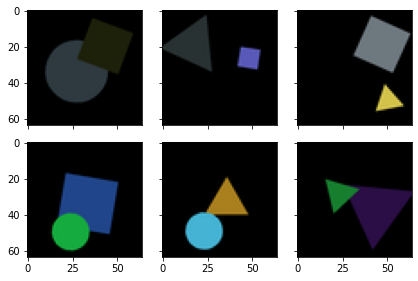

In [11]:
plot_random_dataset_images(random_dataset)

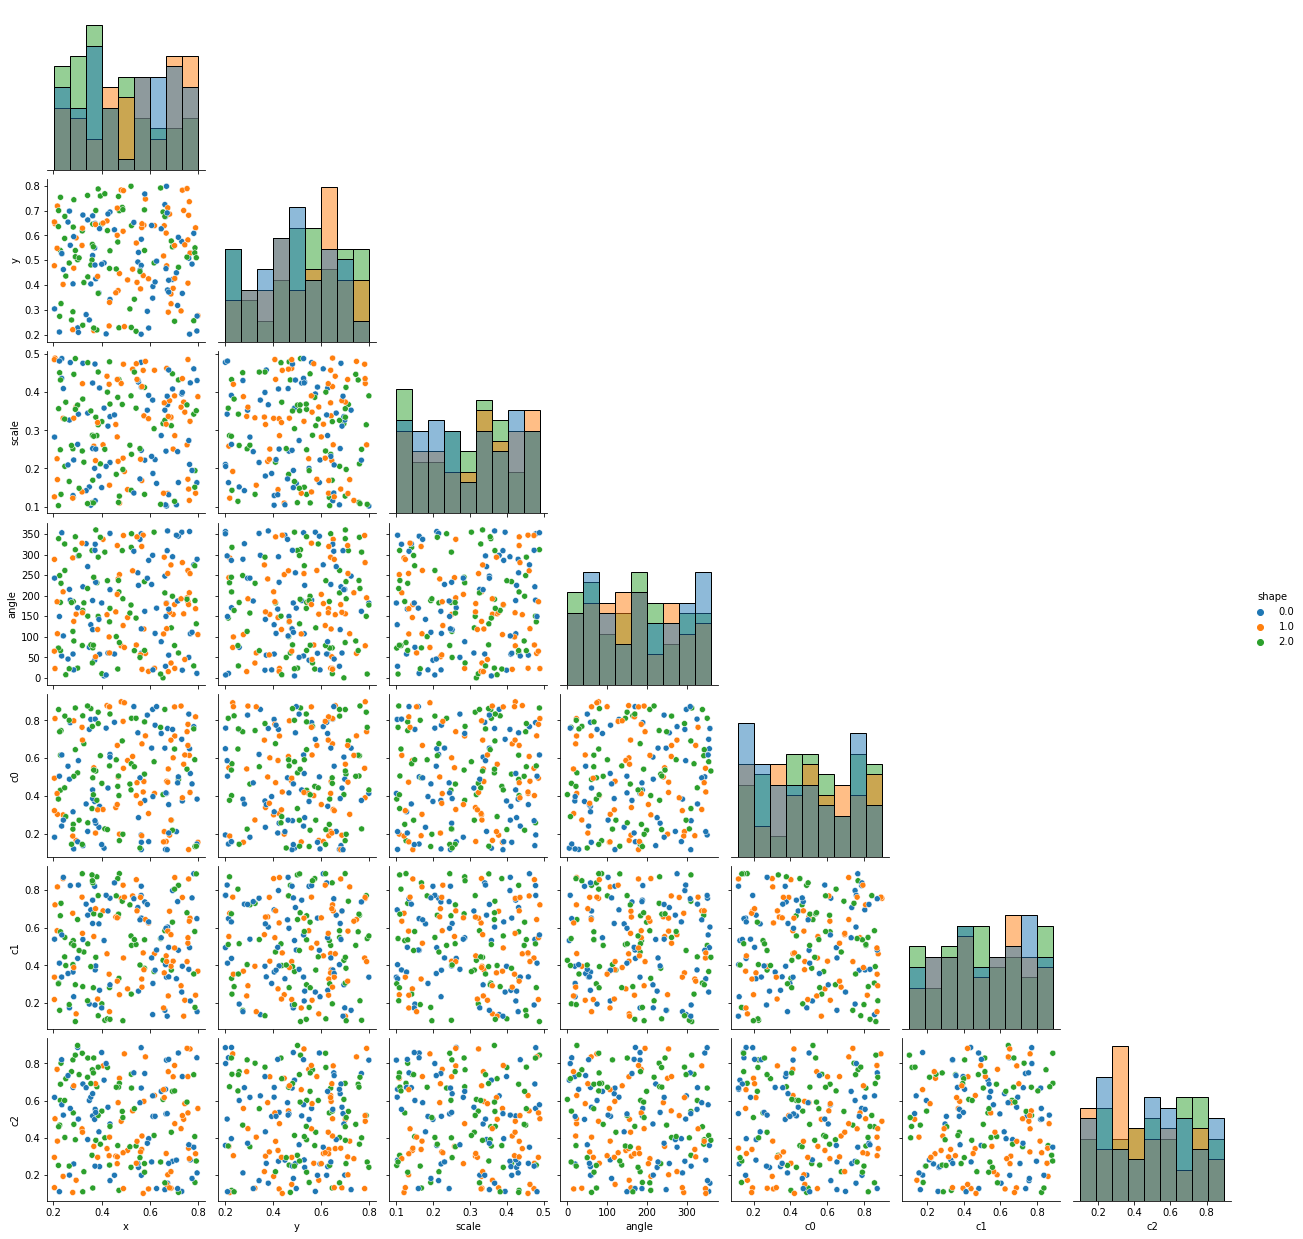

In [12]:
plot_latents_scatter(random_dataset)